In [1]:
# Imports
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Params 
K=50
beta = K

# A fairly ad hoc bias
pi = ones(K)
pi[:20] = 10
pi[10-1] = 100
pi[20-1] = 40
pi[:2] = 0
pi[::2] = 0
pi[5-1] = 20
pi = pi/sum(pi)

setup = dict(
    T = 10000, 
    num_datapoints = 500, 
    K = K, 
    N = 10,
    b = 1,
    eta = 2,
    zeta = 2,
    gamma = inf,
    alpha=beta * pi)

In [3]:
# Run expeirment
num_runs = 500
results = []
for i in range(num_runs):
    if i % 50 == 0 : print(i)
    res = BNG_simulation(**setup)
    results.append(res)


0
50
100
150
200
250
300
350
400
450


In [4]:
import pickle

In [5]:
pickle.dump(results, open('results.pickle', 'bw'))

In [11]:
bases = []
aggregate_languages = []
for res in results:
    aggregate_lang = array(results[0]['phis']).mean(axis=0)
    base = aggregate_lang.argmax() + 1
    bases.append(base)
    aggregate_languages.append(aggregate_lang)

<Container object of 50 artists>

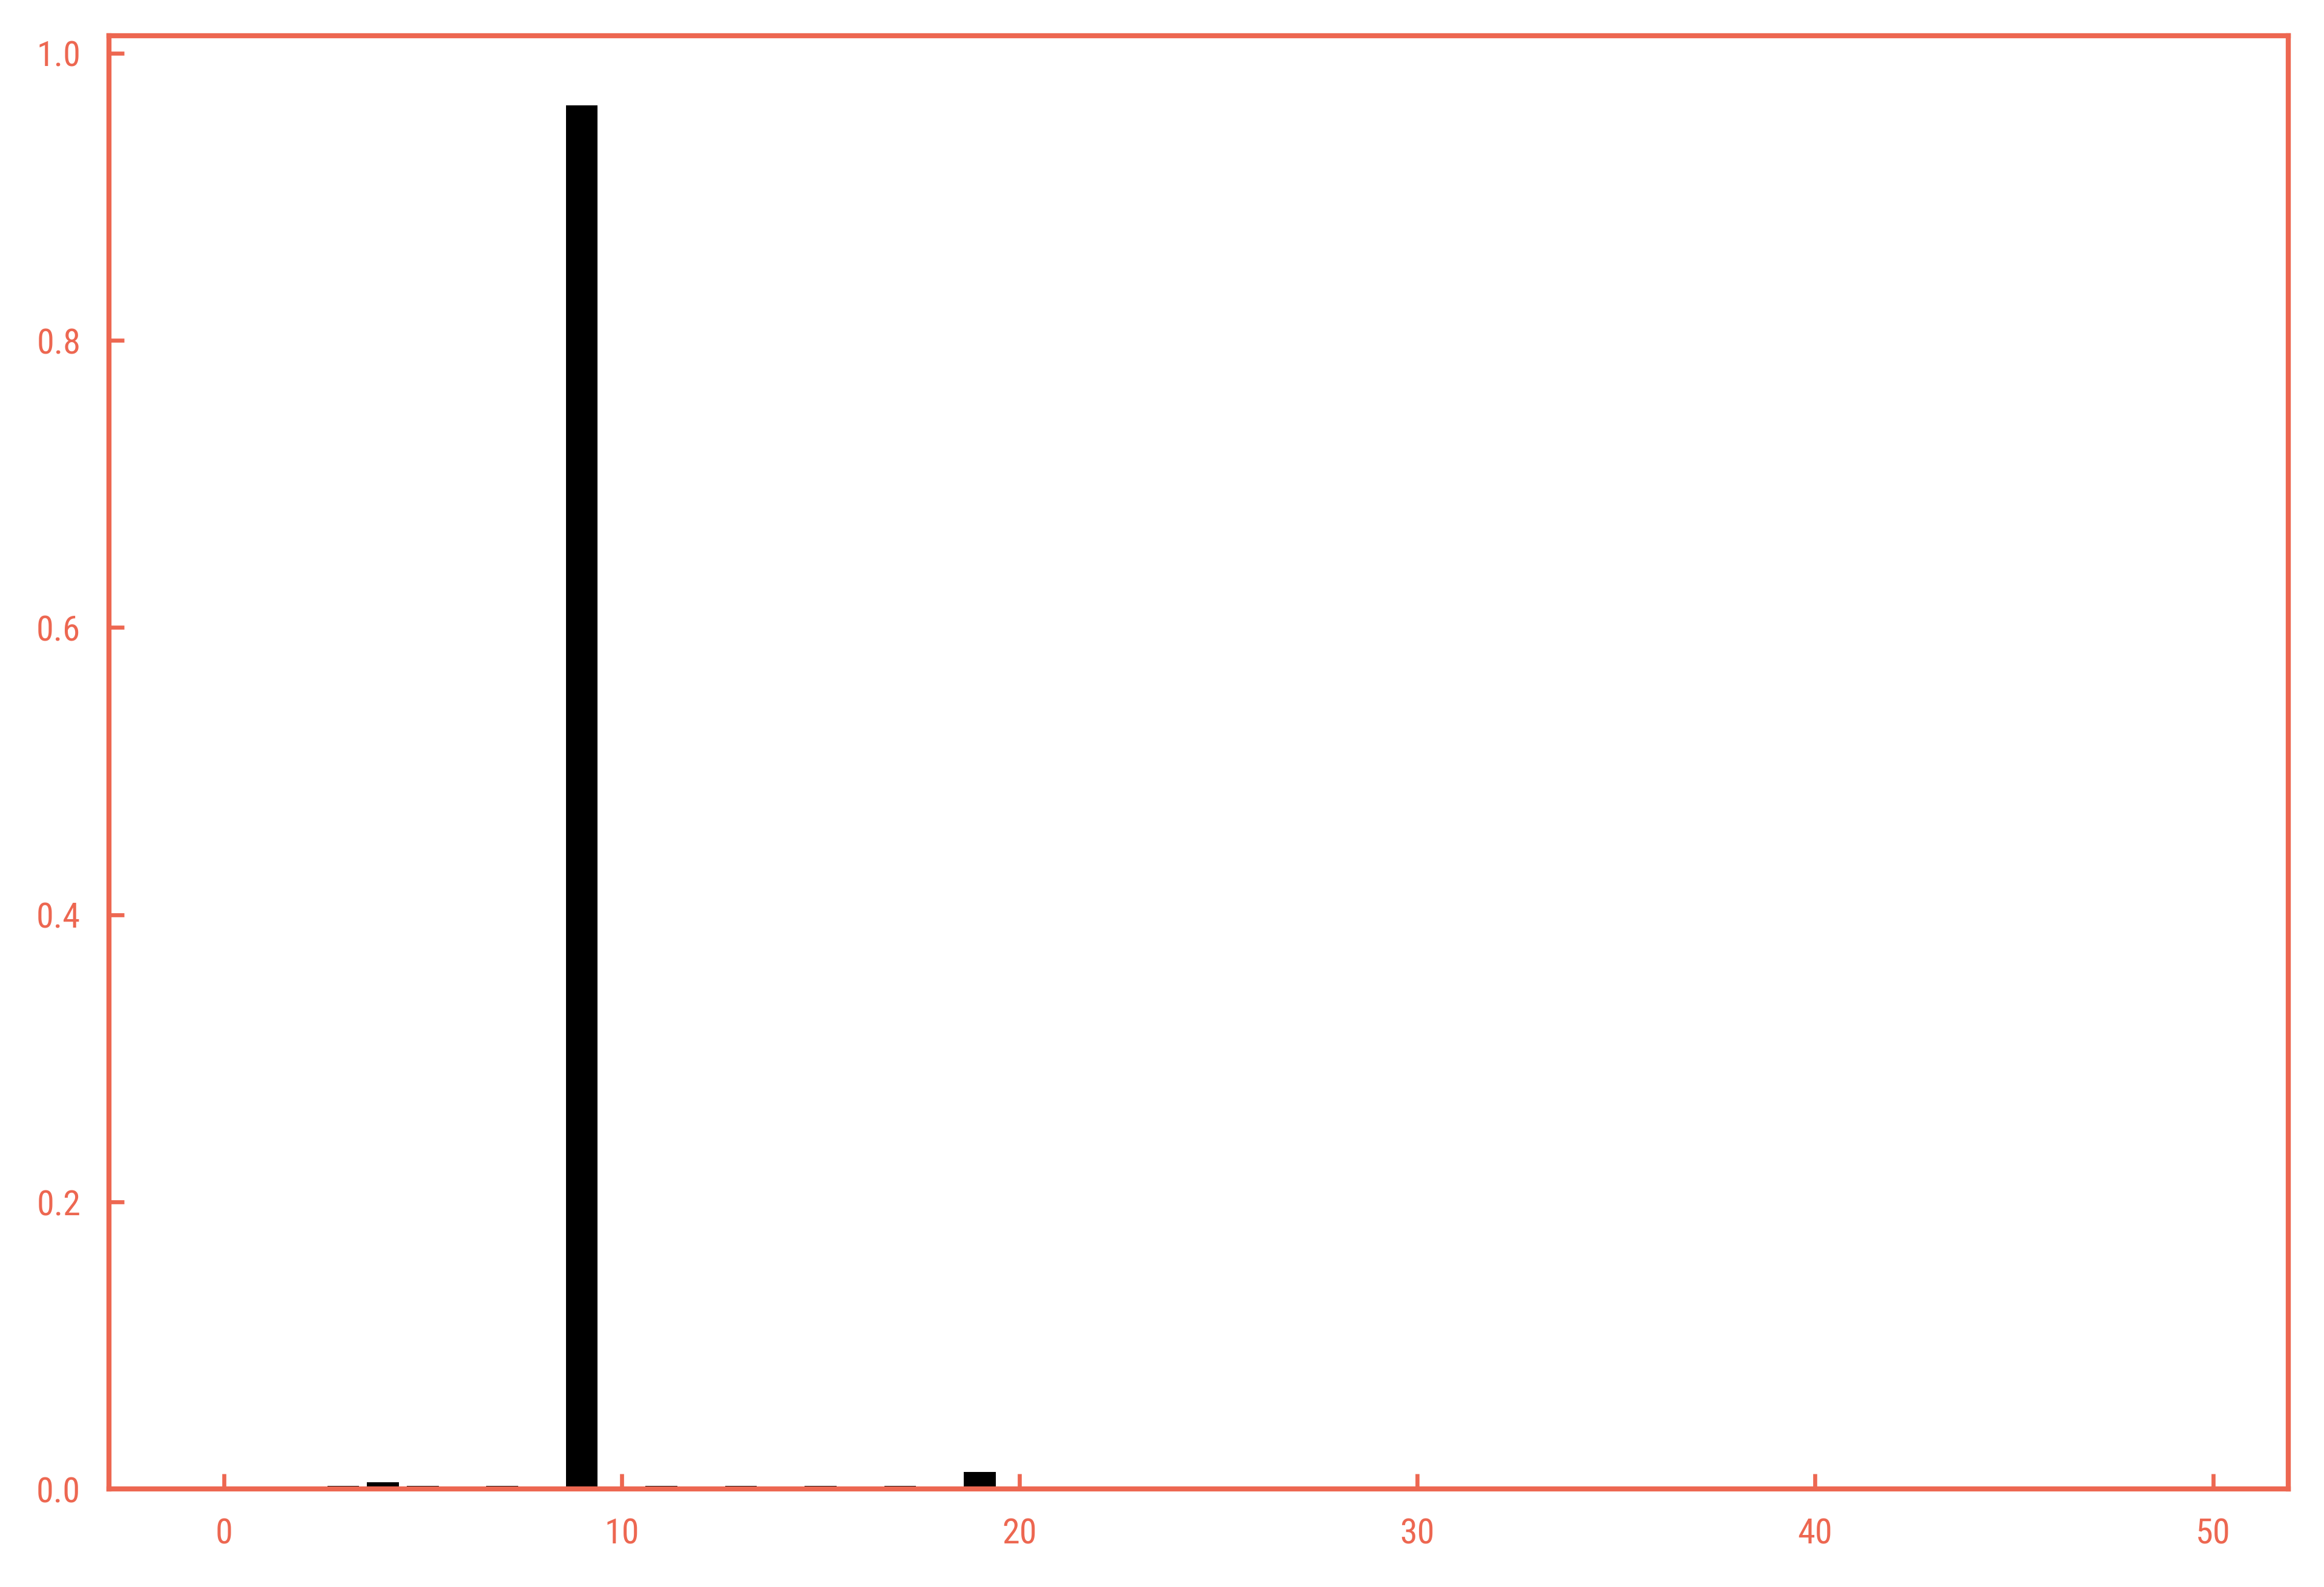

In [13]:
pyplot.bar(arange(K), array(aggregate_languages).mean(axis=0))

(array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
 array([  9.5,   9.6,   9.7,   9.8,   9.9,  10. ,  10.1,  10.2,  10.3,
         10.4,  10.5]),
 <a list of 10 Patch objects>)

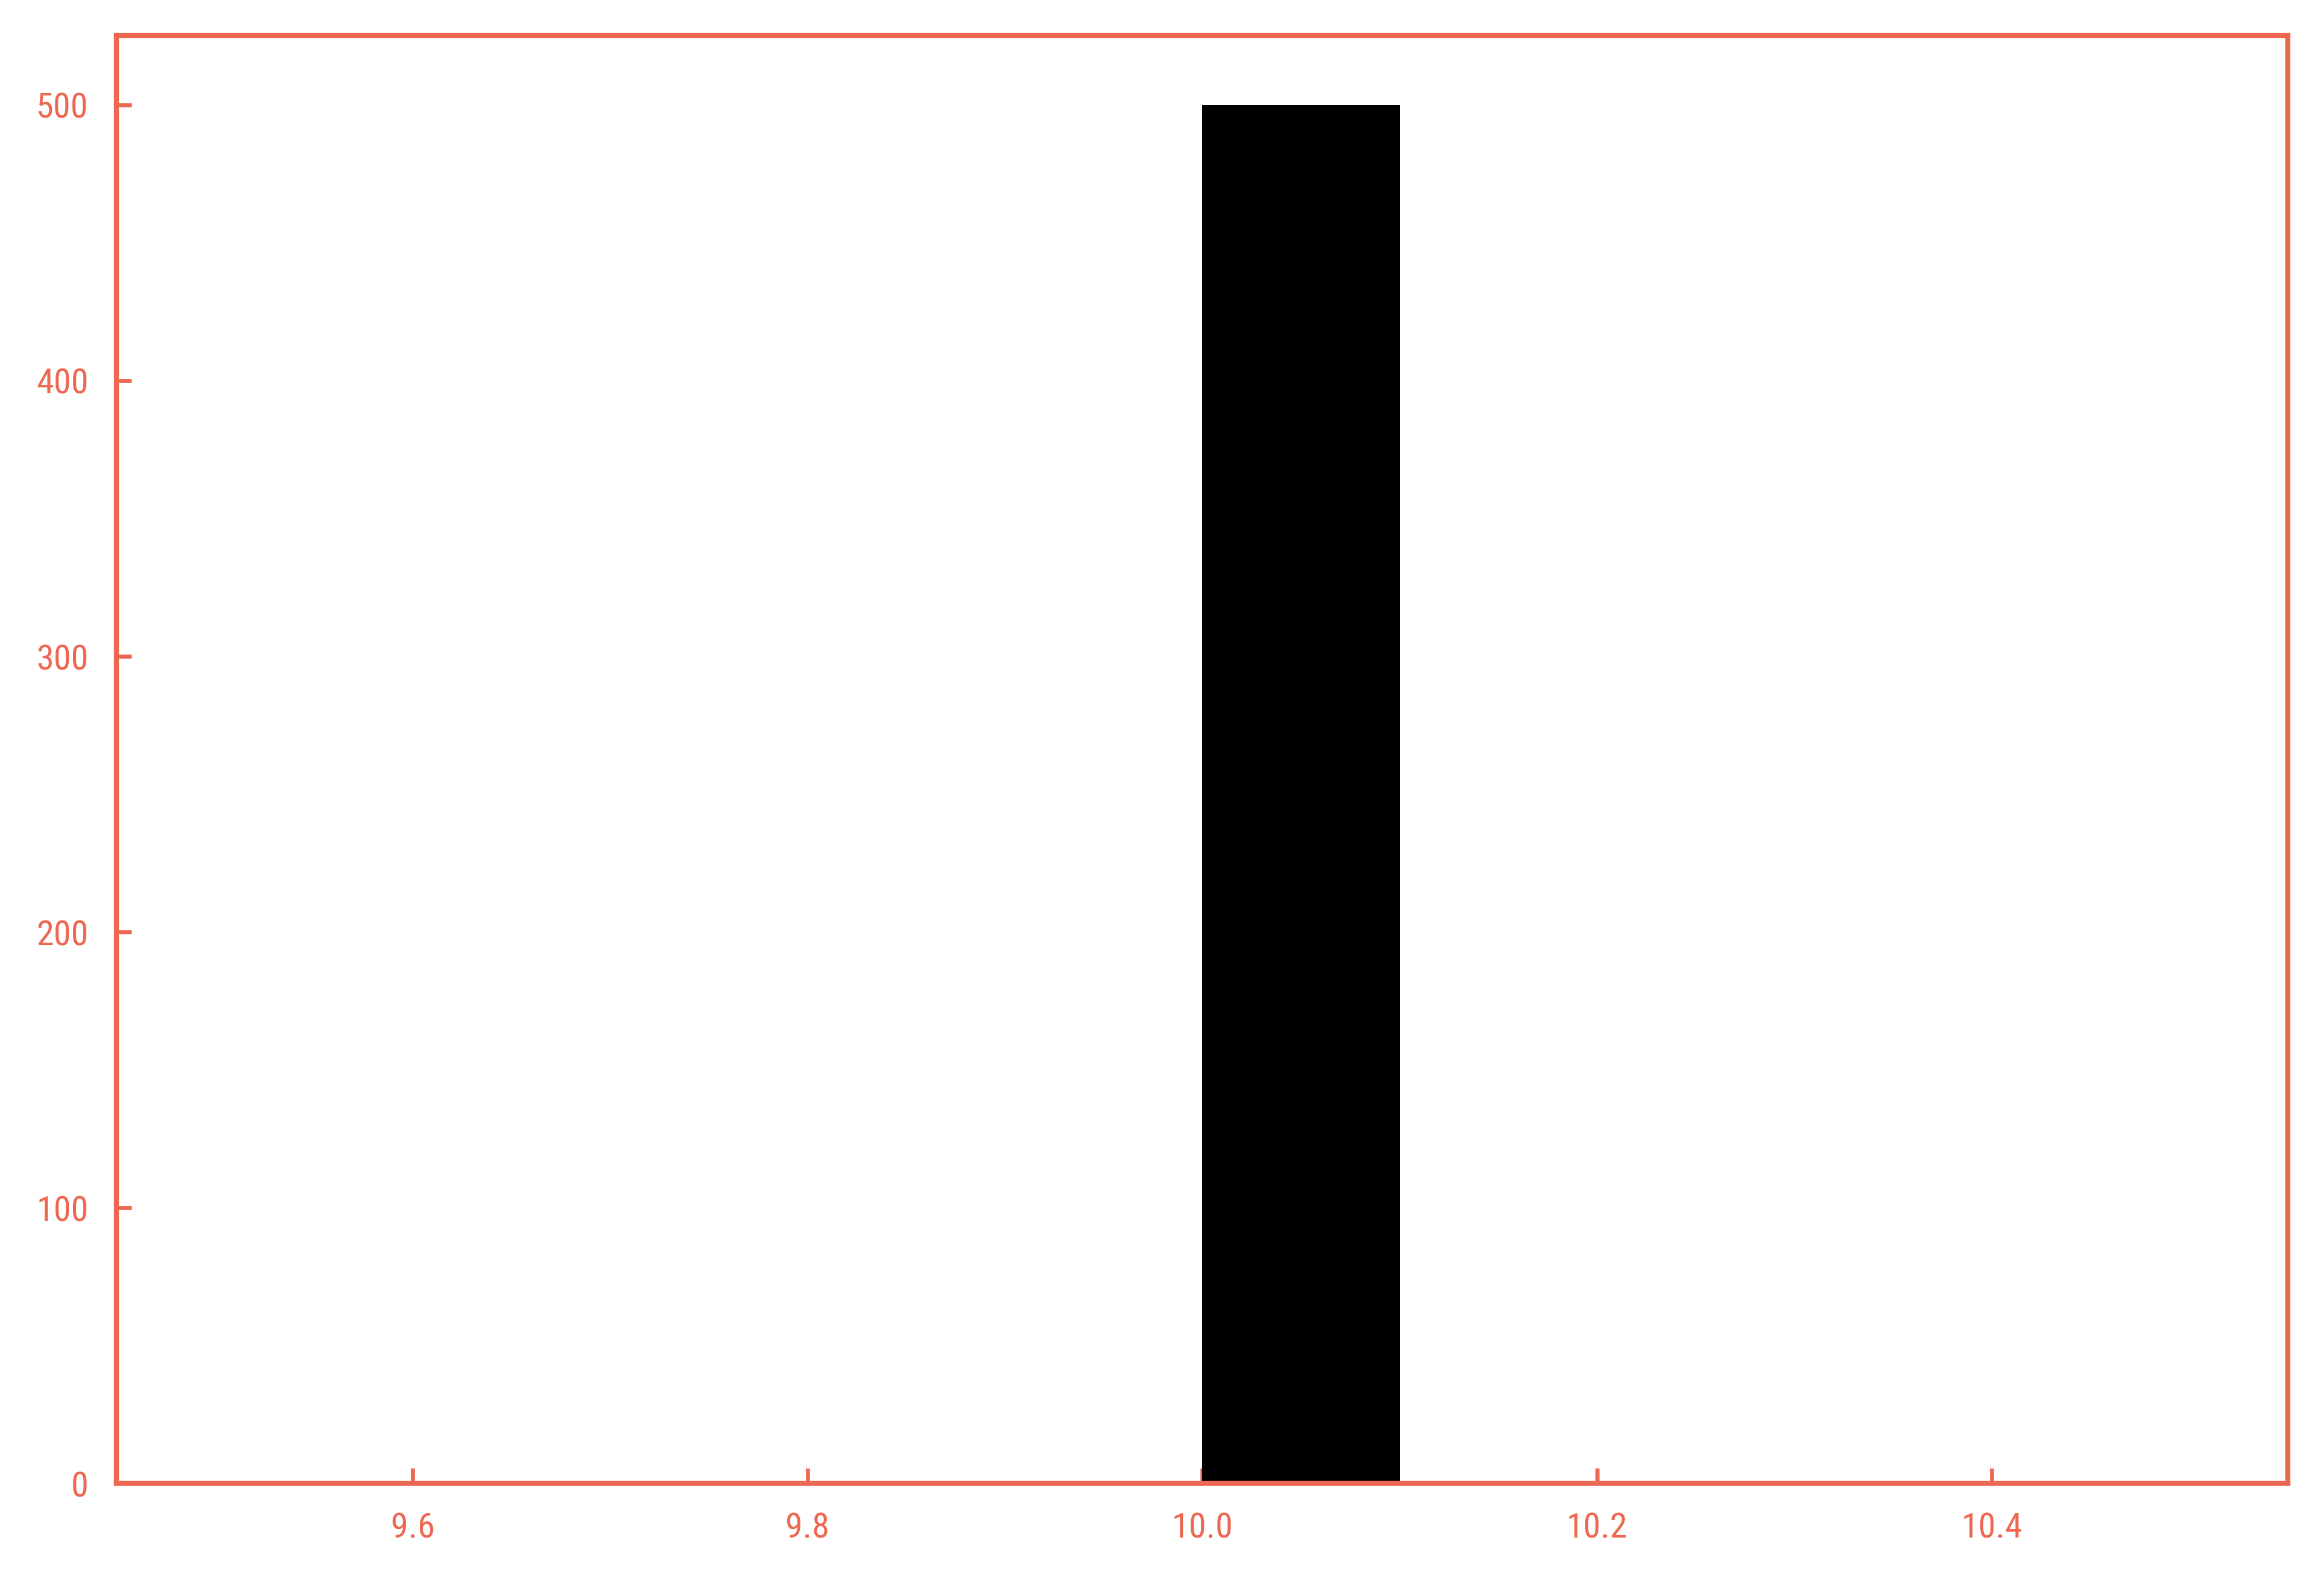

In [8]:
pyplot.hist(bases)

<Container object of 50 artists>

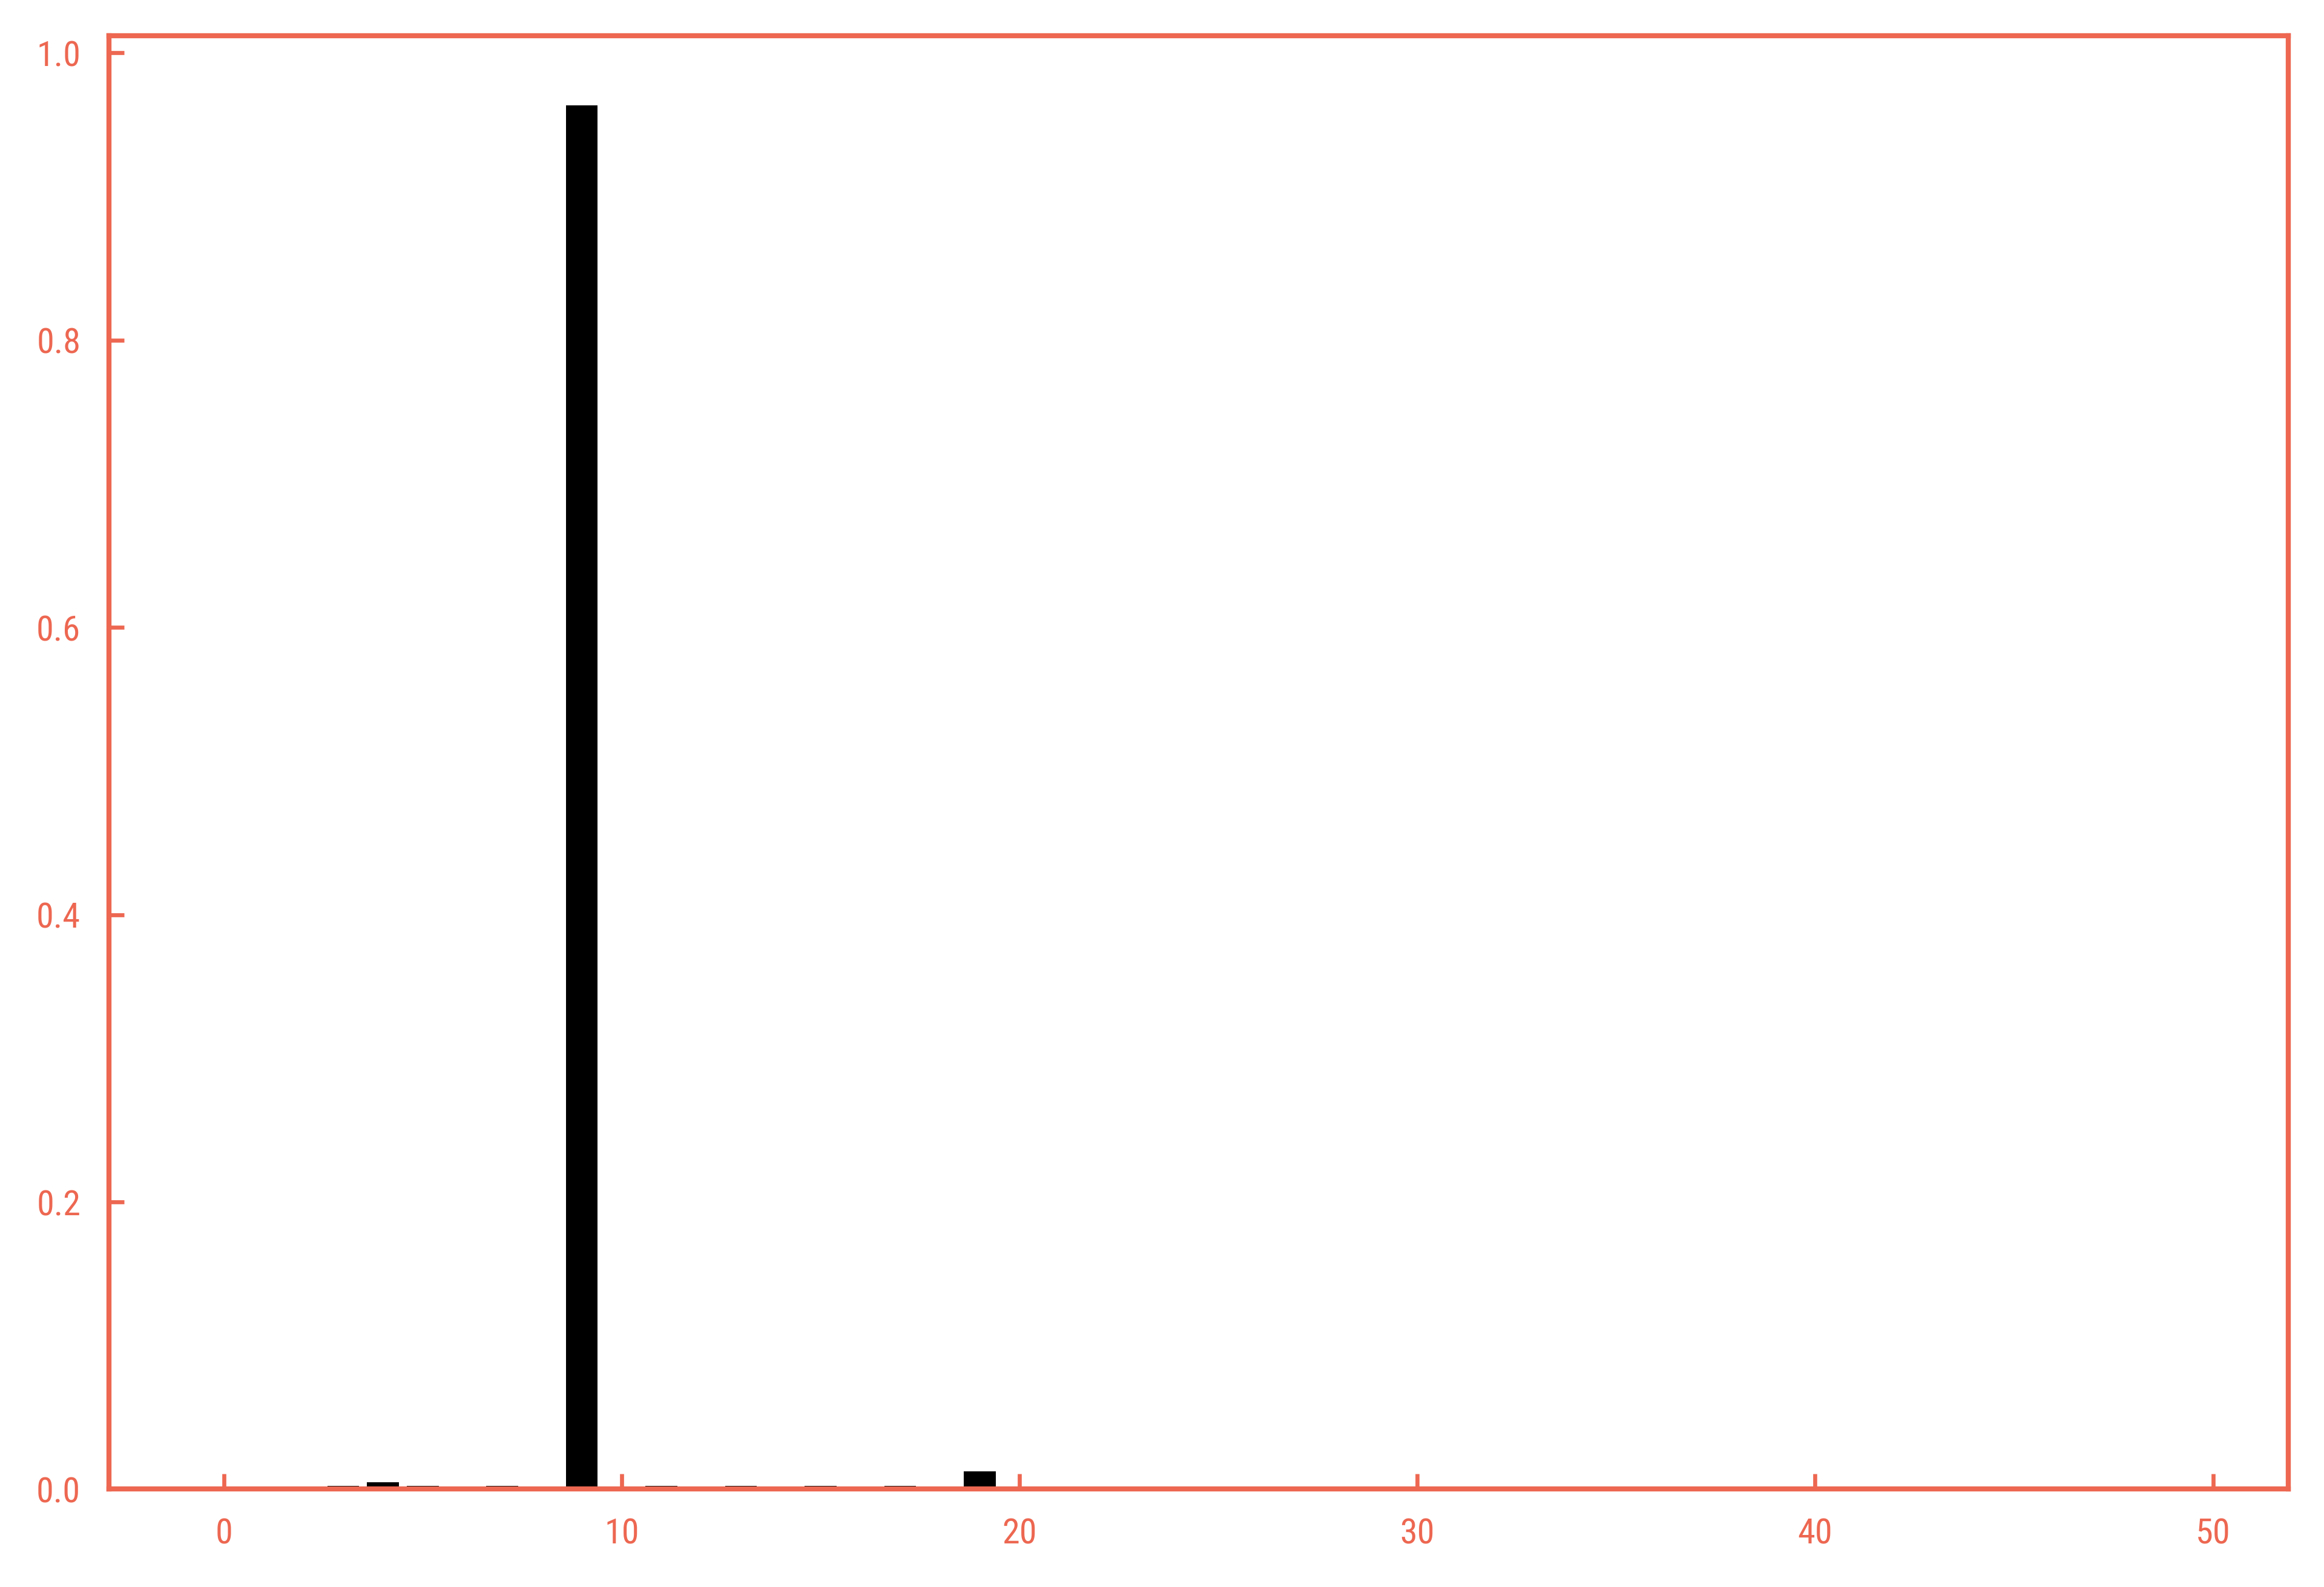

In [28]:
pyplot.bar(arange(K), array(aggregate_languages).mean(axis=0))

In [95]:
_,_,_,_, counts, utterances = repeat_simulation(BNG_simulation, 1, **setup)

/Users/Bas/anaconda/envs/thesis/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log2
/Users/Bas/anaconda/envs/thesis/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply


In [96]:
freqs = array(counts).mean(axis=1).argmax(axis=1)+1

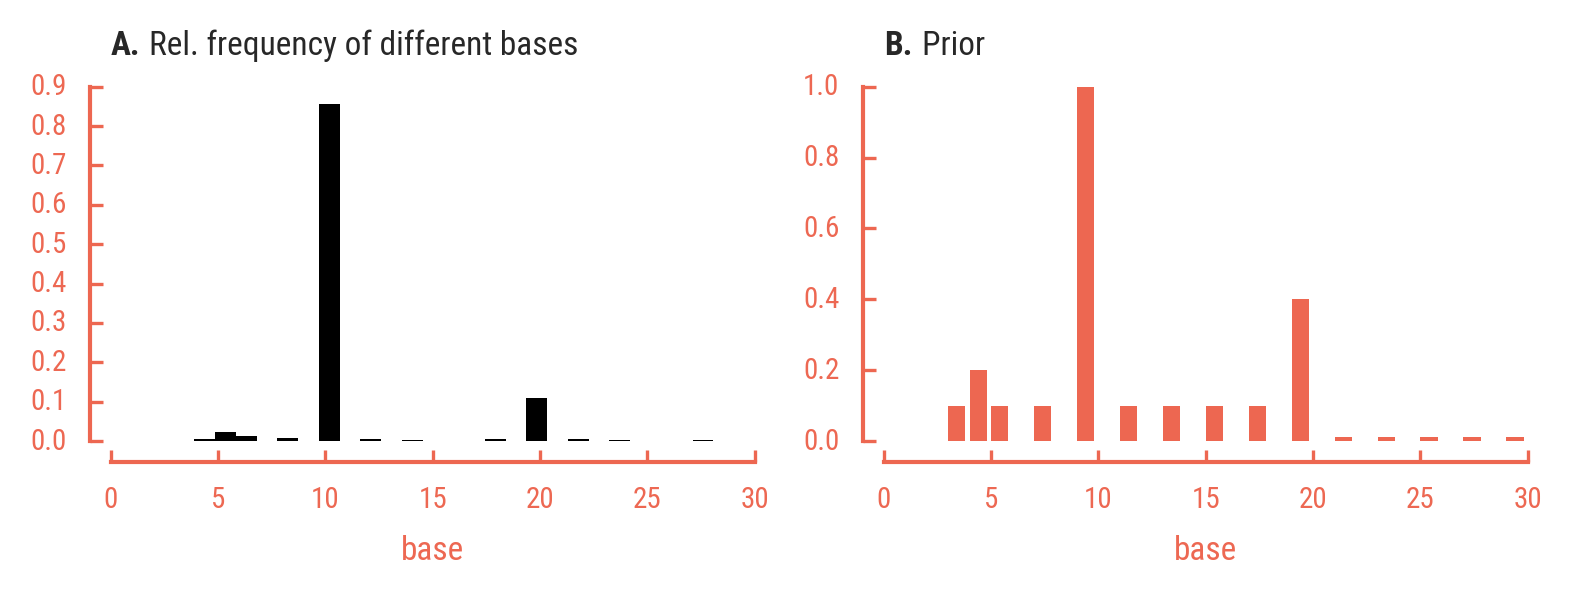

In [102]:
# Plot
figure(figsize=cm2inch(12,3))

ax1 = subplot(121)
f = freqs[freqs<30]
hist(freqs, range=(1,30), bins=30, align='mid', normed=True);
title('Rel. frequency of different bases')
xlabel('base')

ax2 = subplot(122)
pyplot.bar(arange(0,30), alpha.mean(axis=0)[:30])
title('Prior')
xlabel('base')

restyle_title(ax1,ax2)
sns.despine(offset=5)
subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=.6)
savefig('Negotiate-bases.png', dpi=450, bbox_inches='tight')